In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils 

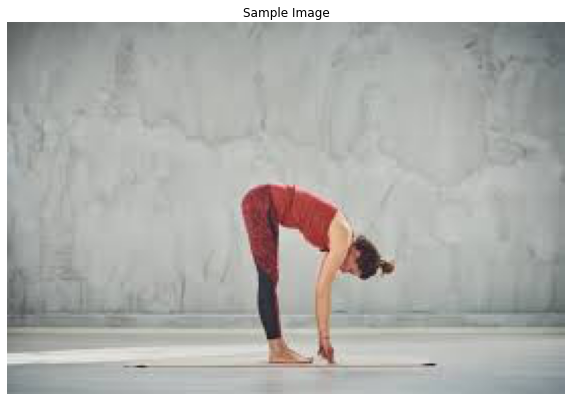

In [3]:
# Read an image from the specified path.
sample_img = cv2.imread(r"C:\Users\asus\OneDrive\Desktop\hackerthon\standingfold 1.png")

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [4]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}') 

NOSE:
x: 0.593115
y: 0.67247134
z: -0.02556091
visibility: 0.99906355

LEFT_EYE_INNER:
x: 0.6076992
y: 0.674271
z: -0.01312645
visibility: 0.9986687



In [5]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(2):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 163.10661733150482
y: 123.06225603818893
z: -7.029250217601657
visibility: 0.9990635514259338

LEFT_EYE_INNER:
x: 167.11728423833847
y: 123.39159071445465
z: -3.6097736563533545
visibility: 0.9986686706542969



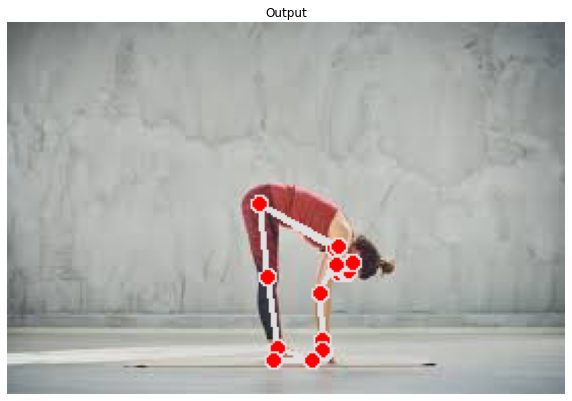

In [6]:
# Create a copy of the sample image to draw landmarks on.
img_copy = sample_img.copy()

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])

    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

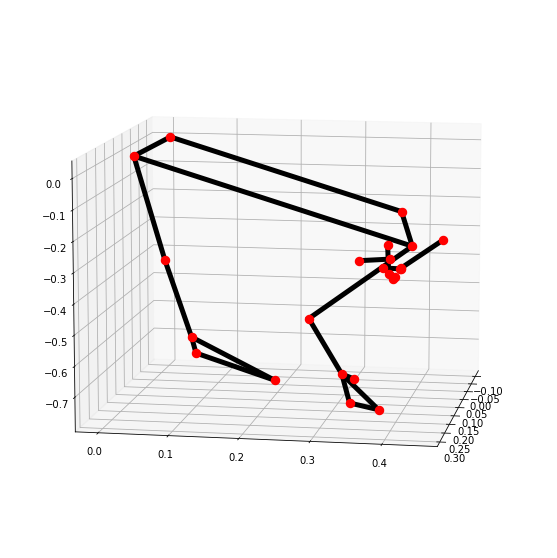

In [7]:
# Plot Pose landmarks in 3D.
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [8]:
def detectPose(image, pose, display=True):
   
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        
        # Return the output image and the found landmarks.
        return output_image, landmarks

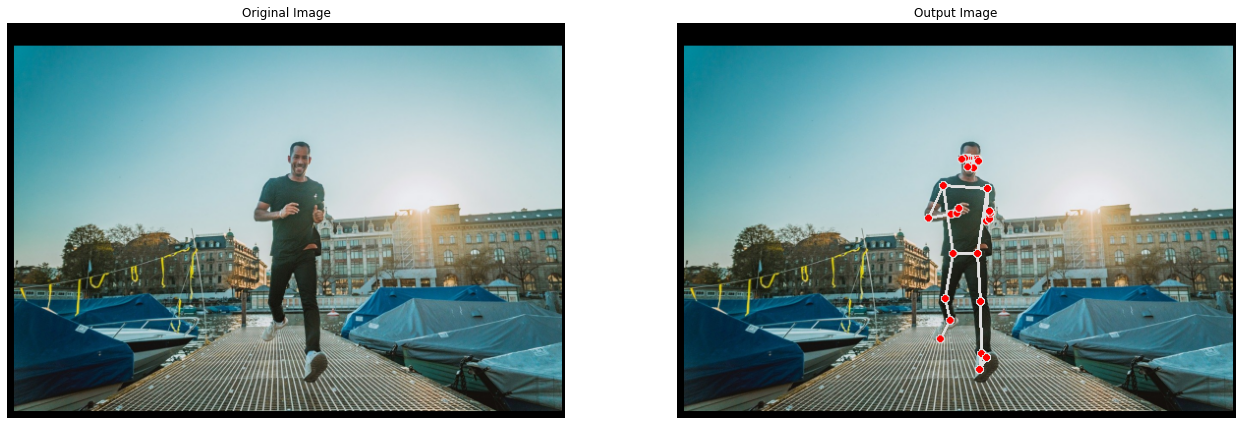

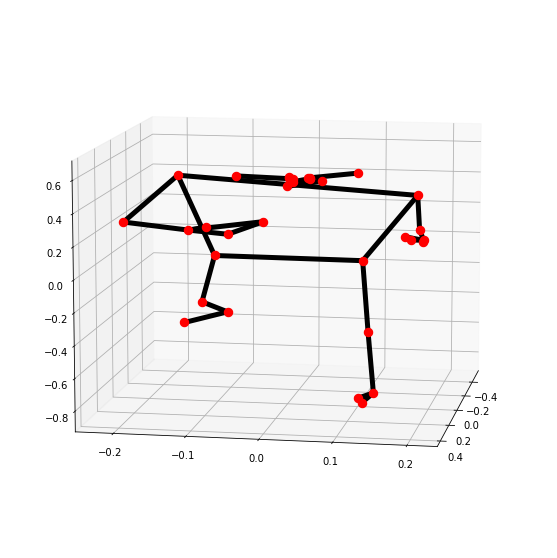

In [9]:
# Read another sample image and perform pose detection on it.
image = cv2.imread(r"C:\Users\asus\OneDrive\Desktop\hackerthon\downloadcrop.png")
detectPose(image, pose, display=True)

In [10]:
# Setup Pose function for video.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
video = cv2.VideoCapture(1)

# Create named window for resizing purposes
cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)


# Initialize the VideoCapture object to read from a video stored in the disk.
#video = cv2.VideoCapture('media/running.mp4')

# Set video camera size
video.set(3,1280)
video.set(4,960)

# Initialize a variable to store the time of the previous frame.
time1 = 0

# Iterate until the video is accessed successfully.
while video.isOpened():
    
    # Read a frame.
    ok, frame = video.read()
    
    # Check if frame is not read properly.
    if not ok:
        
        # Break the loop.
        break
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, _ = detectPose(frame, pose_video, display=False)
    
    # Set the time for this frame to the current time.
    time2 = time()
    
    # Check if the difference between the previous and this frame time > 0 to avoid division by zero.
    if (time2 - time1) > 0:
    
        # Calculate the number of frames per second.
        frames_per_second = 1.0 / (time2 - time1)
        
        # Write the calculated number of frames per second on the frame. 
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    # Update the previous frame time to this frame time.
    # As this frame will become previous frame in next iteration.
    time1 = time2
    
    # Display the frame.
    cv2.imshow('Pose Detection', frame)
    
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF==ord('q')
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        # Break the loop.
        break

# Release the VideoCapture object.
video.release()

# Close the windows.
# cv2.destroyAllWindows()

In [11]:
def calculateAngle(landmark1, landmark2, landmark3):
 

    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle

In [12]:
# Calculate the angle between the three landmarks.
angle = calculateAngle((558, 326, 0), (642, 333, 0), (718, 321, 0))

# Display the calculated angle.
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [13]:
def classifyPose(landmarks, output_image, display=False):
    '''
    This function classifies yoga poses depending upon the angles of various body joints.
    Args:
        landmarks: A list of detected landmarks of the person whose pose needs to be classified.
        output_image: A image of the person with the detected pose landmarks drawn.
        display: A boolean value that is if set to true the function displays the resultant image with the pose label 
        written on it and returns nothing.
    Returns:
        output_image: The image with the detected pose landmarks drawn and pose label written.
        label: The classified pose label of the person in the output_image.

    '''
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
   
    print(f'The calculated  left_elbow_angle is {left_elbow_angle}')
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    print(f'The calculated  right_elbow_angle is {right_elbow_angle}')
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    
    print(f'The calculated  left_shoulder_angle is {left_shoulder_angle}')
    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
   
    print(f'The calculated  right_shoulder_angle is {right_shoulder_angle}')
    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    print(f'The calculated  left_knee_angle is {left_knee_angle}')
    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    print(f'The calculated  right_knee_angle is {right_knee_angle}')
    
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the standing fold pose or the Tadasana pose.
    # As for both of them, both legs should be straight and shoulders should be at the specific angle.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the both legs are straight.
    if left_knee_angle > 155 and left_knee_angle < 195 or right_knee_angle > 155 and right_knee_angle < 195:
   

        # Check if shoulders are at the required angle.
#         if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
        if left_knee_angle > 155 and left_knee_angle < 195 or right_knee_angle > 155 and right_knee_angle < 195:
    # Check if it is the warrior II pose.
    #----------------------------------------------------------------------------------------------------------------

            # Check if one leg is straight.
          
            if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
                # Check if the other leg is bended at the required angle.
#                 if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:
                if left_shoulder_angle > 230 and left_shoulder_angle < 275 and right_shoulder_angle > 90 and right_shoulder_angle < 150:
                    # Specify the label of the pose that is Warrior II pose.
#                     label = 'Warrior II Pose' 
                      label = 'Standing fold/Uttanasana'
                        
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the Tadasana.
    #----------------------------------------------------------------------------------------------------------------
    
            # Check if both legs are straight
#             if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
            if left_elbow_angle > 145 and left_elbow_angle < 180 and right_elbow_angle > 180 and right_elbow_angle < 220:
                if left_shoulder_angle > 165 and left_shoulder_angle < 195 and right_shoulder_angle > 165 and right_shoulder_angle < 195:
                # Specify the label of the pose that is tree pose.
                    label = 'Tadasana'

    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the chair pose.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if one leg is straight
    if left_knee_angle > 75 and left_knee_angle < 145 or right_knee_angle > 75 and right_knee_angle < 145:

        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 75 and left_knee_angle < 145 or right_knee_angle > 75 and right_knee_angle < 145:
            if left_elbow_angle > 175 and left_elbow_angle < 215 and right_elbow_angle > 175 and right_elbow_angle < 215:
                if left_shoulder_angle > 165 and left_shoulder_angle < 250 and right_shoulder_angle > 115 and right_shoulder_angle < 200:
            # Specify the label of the pose that is tree pose.
                    label = 'Chair Pose/ Utkatasana'
                
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the pose is classified successfully
    if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        color = (0, 255, 0)  
    
    # Write the label on the output image. 
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # Check if the resultant image is specified to be displayed.
    if display:
    
        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        
        # Return the output image and the classified label.
        return output_image, label

The calculated  left_elbow_angle is 167.7635319185358
The calculated  right_elbow_angle is 189.78240703180728
The calculated  left_shoulder_angle is 182.2380065139803
The calculated  right_shoulder_angle is 184.95027223429173
The calculated  left_knee_angle is 180.23272444082988
The calculated  right_knee_angle is 178.069412558833


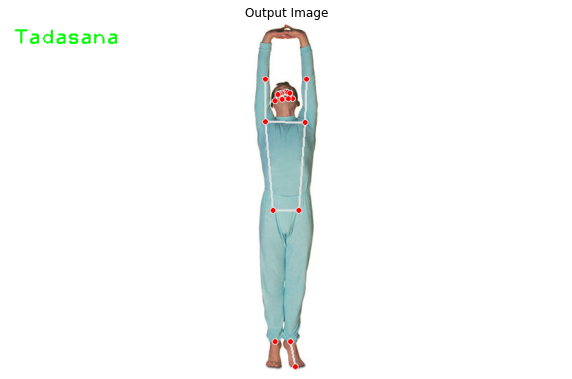

In [14]:
image = cv2.imread(r"C:\Users\asus\OneDrive\Desktop\hackerthon\tadasana.png")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

The calculated  left_elbow_angle is 195.3750875204335
The calculated  right_elbow_angle is 193.872491781188
The calculated  left_shoulder_angle is 230.46903272206453
The calculated  right_shoulder_angle is 133.20353763434034
The calculated  left_knee_angle is 181.93550639771775
The calculated  right_knee_angle is 177.89266449800147


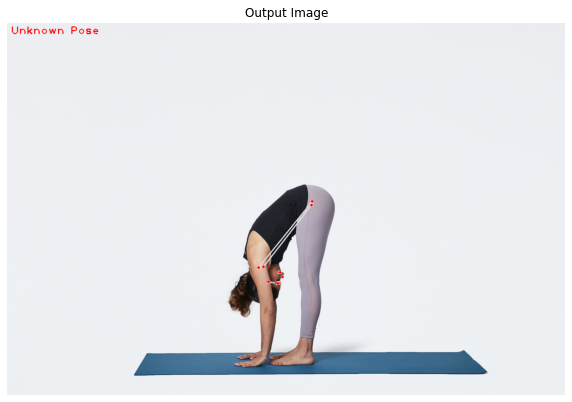

In [15]:
# Read another sample image and perform pose classification on it.
image = cv2.imread(r"C:\Users\asus\OneDrive\Desktop\hackerthon\standingfold 2.png")
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

The calculated  left_elbow_angle is 198.82471001824007
The calculated  right_elbow_angle is 197.2495352391819
The calculated  left_shoulder_angle is 184.58609889617085
The calculated  right_shoulder_angle is 170.64380904306694
The calculated  left_knee_angle is 85.49828970455154
The calculated  right_knee_angle is 90.89354737143657


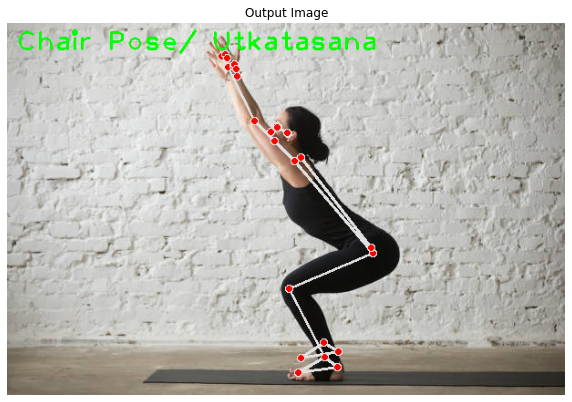

In [16]:
# Read a sample image and perform pose classification on it.
image = cv2.imread(r"C:\Users\asus\OneDrive\Desktop\hackerthon\utkatasana.png")
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True,
                                         min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

The calculated  left_elbow_angle is 184.73928863756942
The calculated  right_elbow_angle is 186.44832600862247
The calculated  left_shoulder_angle is 249.99200973484545
The calculated  right_shoulder_angle is 107.37185018737418
The calculated  left_knee_angle is 158.52977630206357
The calculated  right_knee_angle is 159.86712540355586


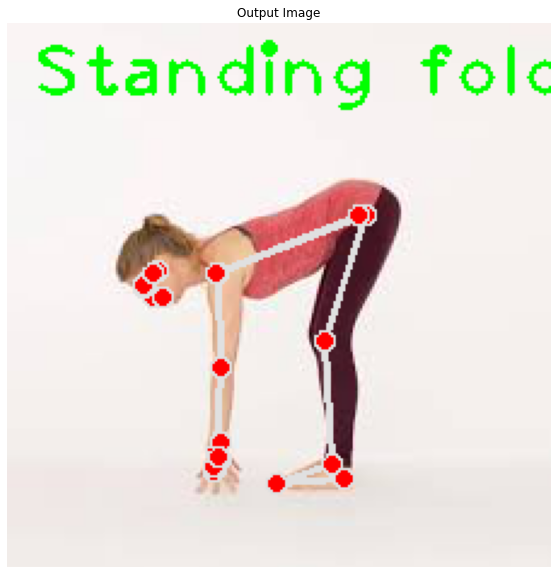

In [17]:
# Read another sample image and perform pose classification on it.
image = cv2.imread(r"C:\Users\asus\OneDrive\Desktop\hackerthon\images.png")
output_image, landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True,
                                         min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

In [18]:
# Setup Pose function for video.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

# Initialize a resizable window.
cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly.
    if not ok:
        
        # Continue to the next iteration to read the next frame and ignore the empty camera frame.
        continue
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, landmarks = detectPose(frame, pose_video, display=False)
    
    # Check if the landmarks are detected.
    if landmarks:
        
        # Perform the Pose Classification.
        frame, _ = classifyPose(landmarks, frame, display=False)
    
    # Display the frame.
    cv2.imshow('Pose Classification', frame)
    
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        # Break the loop.
        break

# Release the VideoCapture object and close the windows.
camera_video.release()
cv2.destroyAllWindows()

The calculated  left_elbow_angle is 226.05873372320278
The calculated  right_elbow_angle is 145.47481198192835
The calculated  left_shoulder_angle is 33.64901735961082
The calculated  right_shoulder_angle is 25.270436270804435
The calculated  left_knee_angle is 183.49669227037182
The calculated  right_knee_angle is 188.33329889179961
The calculated  left_elbow_angle is 245.01138967726448
The calculated  right_elbow_angle is 150.5962963666799
The calculated  left_shoulder_angle is 35.44795280033439
The calculated  right_shoulder_angle is 21.172855224592702
The calculated  left_knee_angle is 178.4033953656228
The calculated  right_knee_angle is 177.5362805241748
The calculated  left_elbow_angle is 238.83654811252146
The calculated  right_elbow_angle is 152.30974948143327
The calculated  left_shoulder_angle is 35.07395889628904
The calculated  right_shoulder_angle is 19.502448506662226
The calculated  left_knee_angle is 179.3932595091362
The calculated  right_knee_angle is 178.15471645089